<h1> The Challenge:</h1>

Based off this dataset with school financial, enrollment, and achievement data, we are interested in what information is a useful indicator of student performance at the state level.

This question is a bit too big for a checkpoint, however. Instead, we want you to look at smaller questions related to our overall goal. Here's the overview:

1. Choose a specific test to focus on
>Math/Reading for 4/8 grade
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create 2 well-labeled visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Pick if you want to do a regression or classification task. For both cases, defined _exactly_ what you want to predict, and pick any model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a> and <a href="https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html">classifiers</a>).
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

** Include comments throughout your code! Every cleanup and preprocessing task should be documented.


Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
# feel free to import other libraries! 

In [14]:
df = pd.read_csv('../data/states_edu.csv')

Chosen test: **<hit `Enter` to edit>**

<h2> Cleanup (optional)</h2>

_Use this space to rename columns, deal with missing data, etc._

In [15]:
# explore the data frame
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


In [16]:
# check the shape of the data
df.shape

(1715, 25)

In [17]:
# explore all the columns
df.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [18]:
# rename some columns for later convenience
df.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)

In [19]:
# explore missing values in each column
df.isna().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL_ALL_EST                   491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
ENROLL_PREK                      173
ENROLL_KINDER                     83
ENROLL_4                          83
ENROLL_8                          83
ENROLL_12                         83
ENROLL_PRIMARY                   695
ENROLL_HS                        644
ENROLL_ALL                        83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

In [20]:
# deal with missing data on focused math test

# since i'm interested in exploring the average math performance in grade 8,
# i remove rows missing AVG_MATH_8_SCORE
df.dropna(subset = ['AVG_MATH_8_SCORE'], inplace=True)

In [21]:
# now check how many rows do we have now (original 1715, now 602)
df.shape[0]

602

In [27]:
# deal with missing data on total enrollment

# since there are two columns representing total student enrollment: 'ENROLL_ALL_EST' and 'ENROLL_ALL',
# i try to use their data to fill each other in.

# first let's see how many missing values in both two columns
print(df['ENROLL_ALL_EST'].isna().sum())
print(df['ENROLL_ALL'].isna().sum())

205
74


In [28]:
# second check to see if whether each enrollment actually sum up to total enrollment,
# and represent the differences as a percent
((df.ENROLL_ALL-df.ENROLL_PREK-df.ENROLL_KINDER-df.ENROLL_PRIMARY-df.ENROLL_HS)/df.ENROLL_ALL*100).describe()

count    394.000000
mean       0.420306
std        1.090873
min        0.000000
25%        0.000000
50%        0.000000
75%        0.188212
max        7.702014
dtype: float64

In [ ]:
# from the result above we can infer that the total enrollment data is 
# relatively the sum of all other enrollment data.

In [31]:
# third, try to fill the missing values in the ENROLL_ALL column with idividual enrollments values
# but, it turns out data missing ENROLL_ALL is also missing all other enrollment data
df[df.ENROLL_ALL.isna()][['ENROLL_PREK','ENROLL_PRIMARY','ENROLL_HS','ENROLL_ALL_EST']].notna().any()

ENROLL_PREK       False
ENROLL_PRIMARY    False
ENROLL_HS         False
ENROLL_ALL_EST    False
dtype: bool

In [30]:
# fourth, try to fill the missing values in the ENROLL_ALL with ENROLL_ALL_EST data
((df['ENROLL_ALL'] - df['ENROLL_ALL_EST'])/df['ENROLL_ALL']).describe()

count    397.000000
mean       0.025946
std        0.051301
min       -0.096404
25%        0.003988
50%        0.013523
75%        0.031392
max        0.450693
dtype: float64

In [32]:
# from the result above we can infer that since the average error between
# the enrollments is ~2%, we can fill the nan values in the ENROLL_ALL_EST with ENROLL_ALL data.
df['ENROLL_ALL_EST'] = df['ENROLL_ALL_EST'].fillna(df['ENROLL_ALL'])

In [35]:
# now let's check whether these are missing values in both two columns 
df[df['ENROLL_ALL_EST'].isna()]['ENROLL_ALL'].notna().sum()

0

In [36]:
# data has been cleaned up! we renamed the columns and dealed with the missing values.

<h2> Feature Selection </h2>

_Use this space to modify or create features_

In [ ]:
# we know the data is state-wide and also longitudinal (over time). In this section,
# in order to take into account the population differences in each state,
# i will one more variable INSTRUCTION_EXPENDITURE_PER_STUDENT to my analysis 
# as a percentage of total expenditure to make the instruction expenditure more informative. 

In [39]:
# create a new variable which represents instruction expenditure per student
df['INSTRUCTION_EXPENDITURE_PER_STUDENT'] = df['INSTRUCTION_EXPENDITURE'] / df['ENROLL_ALL']

Final feature list: **<YEAR, TOTAL_REVENUE, ENROLL_8, AVG_READING_8_SCORE, INSTRUCTION_EXPENDITURE_PER_STUDENT\>**

Final feature list includes YEAR, TOTAL_REVENUE, ENROLL_8,  AVG_READING_8_SCORE, and INSTRUCTION_EXPENDITURE_PER_STUDENT, total 5 features.

Feature selection justification: **<BRIEFLY DESCRIBE WHY YOU PICKED THESE FEATURES\>**

These features are chosen for exploring whether they will affect the average math score of 8th grade and how we can use these features to predict the average math score of 8th grade.

From my point of view, these features may help predict math test scores in 8th grade. Among them, instruction expenditure feature needs to be standardized and represents as the percentage of total expenditure, because the population differences in different states should be taken into account to make the instruction expenditure feature comparable and informative.


<h2> EDA </h2>

Visualization 1

Text(0.5, 1.0, 'Distribution of 8th grade math scores')

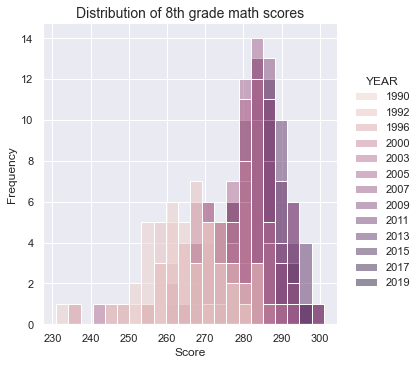

In [112]:
# explore the distribution of average math scores in 8th grade along different years
sns.displot(data=df, x='AVG_MATH_8_SCORE', hue='YEAR')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of 8th grade math scores', size=14)


**<CAPTION FOR VIZ 1>**

The graph above is the distribution of the average math scores in 8th grade.

First, according to the average math socre of 8th grade on NAEP website, the basic score is about 260, the proficient score is about 300, and the advanced score is about 335. As can be seen from the graph that the majority of 8th grade average math scores are higher than the basic 260 and lower than the proficiency level 300, most concentrated in 280 points. There are also some scores below the basic score 260. 

Second, from the perspective of year, we can see that the average math score of 8th grade has gradually increased from 1990 to 2019. After around 2009, the average math scores of 8th grade are distributed in the 275-300 score range, and before 2010, the scores are in the 250-270 range.


Visualization 2

Text(0.5, 1.0, 'The Relationship \n Between Reading Score and Math Score of 8th Grade')

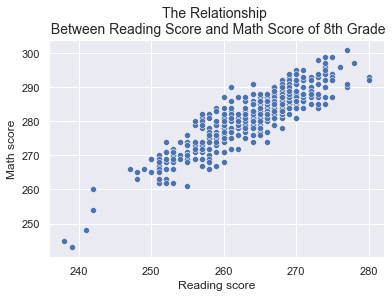

In [116]:
# make a scatter plot to see the relationship between 
# reading score and math score of 8th grade
sns.scatterplot(data=df, x= 'AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE');
plt.xlabel('Reading score')
plt.ylabel('Math score')
plt.title('The Relationship \n Between Reading Score and Math Score of 8th Grade', size=14)

**<CAPTION FOR VIZ 2>**

This is a scatter plot to explore the relationship between the average reading score in 8th grade and the average math score in 8th grade.

As can be seen from the above scatter plot, the average reading score is positively correlated with the average math score. Therefore, we can infer that the average reading score may be a good indicator for predicting the average math score. 


<h2> Data Creation </h2>

_Use this space to create train/test data_

Create training and testing data
Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?

Train a ML model to predict outcome
Pick if you want to do a regression or classification task. For both cases, defined exactly what you want to predict, and pick any model in sklearn to use (see sklearn regressors and classifiers).

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
# in this part, i only choose the last 10 years data as my trainning and testing data 
last_10yr_df = df[df['YEAR'] > 2009]

In [122]:
# get only the features i'm interested and locate the target math data 
X = last_10yr_df[['YEAR','TOTAL_REVENUE','ENROLL_8','AVG_READING_8_SCORE','INSTRUCTION_EXPENDITURE_PER_STUDENT']].dropna()
y = last_10yr_df.loc[X.index]['AVG_MATH_8_SCORE']

In [123]:
# split the data into trainning data and testing data
X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=.3, random_state=0)

<h2> Prediction </h2>

Chosen ML task: **<REGRESSION/CLASSIFICATION>**

In [124]:
# I pick sklearn's LinearRegression to do a regression prediction
# import sklearn LinearRegression class 
from sklearn.linear_model import LinearRegression

In [96]:
# create model
model = LinearRegression()

In [97]:
# fit trainning data to the model
model.fit(X_train, y_train)

LinearRegression()

In [98]:
# get the predicted data from the testing data
y_pred = model.predict(X_test)

In [126]:
# now, let's check the intercept value and all the coefficients values
print(model.intercept_)
print(model.coef_)

-314.16434102037186
[ 1.43106840e-01 -1.36440862e-07  2.39814576e-05  1.15838350e+00
  3.16491930e-01]


In [ ]:
# From the coefficient values, we can see that among all the five predictors, the top three positive predictor variables 
# are the AVG_READING_8_SCORE, INSTRUCTION_EXPENDITURE_PER_STUDENT, and YEAR. Take the AVG_READING_8_SCORE as example, 
# with all other variables held constant, a one score change in reading score results in a 1.16-point increase in math score, on average. 

In [127]:
# check the R-squared value to see how well the linear model fits the data
model.score(X_test, y_test)

0.8265177717154109

In [ ]:
# since the R-squared is 0.8, it means my regression model fitting the obsevatons well

In [129]:
#  check the mean absolute error
np.mean(np.abs(model.predict(X_test)-y_test))

2.651485760440138

In [130]:
# also check the root mean squared error to penalizes some possible large errors
np.mean((model.predict(X_test)-y_test)**2)**0.5

3.4152201039833052

In [ ]:
# Since both the mean absolute error and the root mean squared error are relatively low,
# the regresson model is concidered quit good. 

In [125]:
# FOR CLASSIFICATION ONLY:
# from sklearn.metrics import plot_confusion_matrix

# plot_confusion_matrix(model, X_test, y_test,
#                          cmap=plt.cm.Blues)

Text(0, 0.5, 'Math 8 score')

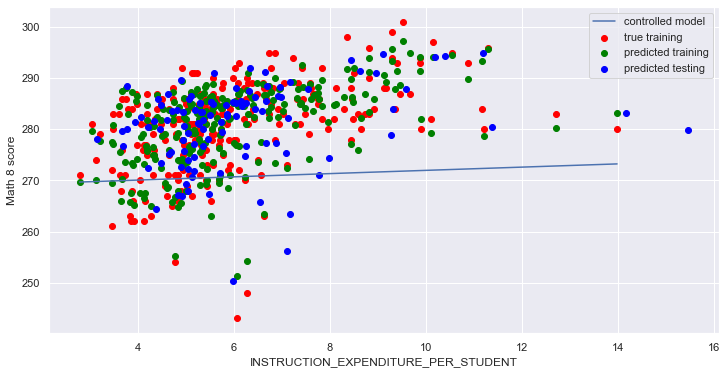

In [105]:
# FOR REGRESSION ONLY: (pick a single column to visualize results)

# Results from this graph _should not_ be used as a part of your results -- it is just here to help with intuition. 
# Instead, look at the error values and individual intercepts.

features=['YEAR','TOTAL_REVENUE','ENROLL_8','AVG_READING_8_SCORE','INSTRUCTION_EXPENDITURE_PER_STUDENT']
col_name = features[4]
col_index = X_train.columns.get_loc(col_name)

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")
plt.scatter(X_test[col_name], model.predict(X_test), color = "blue")

new_x = np.linspace(X_train[col_name].min(),X_train[col_name].max(),200)
intercept = model.predict([X_train.sort_values(col_name).iloc[0]]) - X_train[col_name].min()*model.coef_[col_index]
plt.plot(new_x, intercept+new_x*model.coef_[col_index])

plt.legend(['controlled model','true training','predicted training','predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK AND FINDINGS\>**

About the project:

In this project, i'm interested in analysis the relationship between the predictor variables and the response variable to find out if those predictors, time, total revenue, 8th grade enrollment, average reading score of 8th grade, and instruction expenditure per student, may have a meanningful impact on the average math score of 8th grade. Therefore, i used raw state_edu.csv data to find insight about the math socre of 8th grade in running regression analysis. 

Below are my workfolw and findings:

Workflow:
1. data cleaning and exploration. In this part, i renamed the columns, dealed with missing values, and explored the possible relationship between different features by making visuliations.
2. feature engineering. Here, I chose the math score of 8th grade feature as my response variable, and picked five features (year, total revenue, 8th grade enrollment, average reading score of 8th grade, and instruction expenditure per student) as predictor variables to predict the average math score of 8th grade. Besides, i also standardized the instruciton expenditure feature as percentage to reduce the impact of different populations in different states, and narrow down the data to the last 10 years (2011-2019) only.
3. applying regression analysis. In this section, i trained and tested the prepared data, examed the performance of the regression model, and found some interesting findings.

Findings:

From the coefficient values, we can see that among all the five predictors, the top three positive predictors are the average reading score, instruciotn expenditure per student, and the year. Take the average reading socre as example, with all other predictor variables held constant, a one score change in reading score results in a 1.16-point increase in math score, on average. Similarly, one score change in instruction expenditure per student results a 0.32-point increase in math score on average with other predictors held constant. Interested enough that the total revenue (coefficient is -1.36440862e-07) has a little nagtive impact on the average math score. 

Since the R-squared is relatively high (0.8), and both the mean absolute error and the root mean squared error are relatively low (2.65, 3.42 respectively), the regresson model is concidered quit good. In conclusion, the average reading score of 8th grade and instruction expenditure are the good predictor for the average math score of 8th grade while the total revenue is not a good predictor for the average math score of 8th grade. 

